###Example of S/N ratio analysis based on the coefficient of coherence###



If we assume that, for a seismic trace $T(t)$, both the reflectivity log $r(t)$ and the noise $n(t)$ are random and the signal wavelet $s(t)$ is stationary,

$$ T(t) = r(t)\ast s(t) + n(t)$$


the autocorrelation of the trace is: 

$$ T(t) \star T(t) = \left[ r(-t)\ast s(-t) + n(-t) \right] \ast \left[ r(t)\ast s(t) + n(t) \right]  $$

$$ \phi_{T,T}(\theta)  = k\phi_{s,s}(\theta) + \phi_{n,n}(\theta)$$

Since $n(t)$ is random and of limited length, its autocorrelation is close to a Dirac function, and is therefore concentrated on the central peak of $\phi_{T,T}$. The autocorrelation of a seismic trace is therefore equal to a *sum  of the autocorrelation of the signal wavelet (except for a multiplication factor) and the autocorrelation of the noise*

If we now consider two neighbouring seismic traces $T_1(t)$ and $T_2(t)$ with the same information content - $r(t)$ and $s(t)$ - but with independent random noise, their crosscorrelation is written:

$$ \phi_{T_1,T_2}(\theta)  = k\phi_{s,s}(\theta)$$

If we assume that the average energy of random noise on neighbouring traces is contant. Hence:

$$ \phi_{n_1,n_1}(\theta) = \phi_{n_2,n_2}(\theta) $$

and reasonably 

$$ \phi_{T_1,T_1}(\theta) = \phi_{T_2,T_2}(\theta) $$

When calculating the correlation of two neighbouring traces: $ \phi_{T_1,T_2}(\theta)  = k\phi_{s,s}(\theta)$, if **we set the scales such that k=1**:

$$ \phi_{T_1,T_2}(\theta)  = \phi_{s,s}(\theta)$$

With the **same scales**:

$$ \phi_{T,T}(\theta)  = \phi_{s,s}(\theta) + \phi_{n,n}(\theta)$$

Combining all these results and knowing the correspondent Fourier Transform of the auto and cross correlation functions $ \Phi(f) $, we have:


$$ \phi_{T_1,T_2}(\theta) = \phi_{T_2,T_1}(\theta) \Longleftrightarrow  \Phi_{T_1,T_2}(f) = \Phi_{T_2,T_1}(f) = \Phi_{S,S}(f)$$

$$ \phi_{T_1,T_1}(\theta) = \phi_{T_2,T_2}(\theta) \Longleftrightarrow  \Phi_{T_1,T_1}(f) = \Phi_{T_2,T_2}(f) = \Phi_{S,S}(f) + \Phi_{N,N}(f)$$

Note: remember that auto-correlation of a function is equivalent to its power spectrum,

The right and left sides can both be calculated, using ratios of symmetrical expressions and manipulating according to G. Henry we can have the **coeficient of coherence** $C(f)$ defined as:

$$C(f) = \left(\frac{\Phi_{T_1,T_2}(f)\star \Phi_{T_2,T_1}(f)}{\Phi_{T_1,T_1}(f)\star\Phi_{T_2,T_2}(f)}\right)^{\frac{1}{2}}$$

that is equivalent to:

$$C(f) = \frac{\Phi_{S,S}(f)}{\Phi_{S,S}(f)+\Phi_{N,N}(f)} = \frac{\left|S(f)\right|^2}{\left|S(f)\right|^2+\left|N(f)\right|^2} $$

The closer it gets to 1, more similar the two traces are also $N(f)$ is closer to zero.


###Lets use a simple signal and contaminate it with different levels of noise###

For comparison we create:

1. one pair with 5% noise proportional to the original signal amplitude

2. second pair with 15% noise proportional to the original signal amplitude

Then we plot one of each pair **green** and **red** respectively.

The energy used are on the 11, 9, 5 and 3 Hz

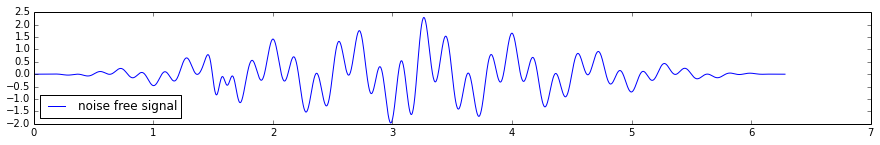

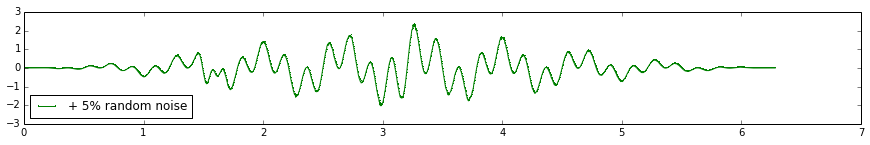

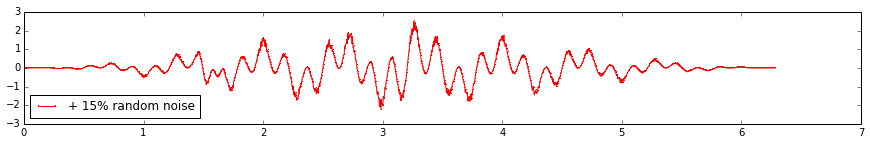

In [5]:
import numpy as np
import pylab 
from scipy import signal

%matplotlib inline 

n = 2000
t = np.linspace(0, 2*3.14159, n)
y = np.cos(t*3*np.pi)+np.cos(t*11*np.pi)+signal.gausspulse(t-0.5*np.pi, fc=9)-signal.gausspulse(t-np.pi, fc=5) # noise free
y = y*signal.hanning(n) # in case you want to test just uncomment it
y -= y.mean()
y0 = y + 0.05*y*(2*np.random.rand(n)-1) # + noise A 5%
y1  = y + 0.05*y*(2*np.random.rand(n)-1) # + noise B 5%
y2 = y + 0.15*y*(2*np.random.rand(n)-1) # + noise C 15%
y3  = y + 0.15*y*(2*np.random.rand(n)-1) # + noise D 15%
pylab.figure(figsize=(15,2))
pylab.plot(t, y, 'b', label="noise free signal")
pylab.legend(loc=3)
pylab.figure(figsize=(15,2))
pylab.plot(t, y1, ',g-', label="+ 5% random noise")
pylab.legend(loc=3)
pylab.figure(figsize=(15,2))
pylab.plot(t, y2, ',r-', label="+ 15% random noise")
pylab.legend(loc=3)
pylab.show()

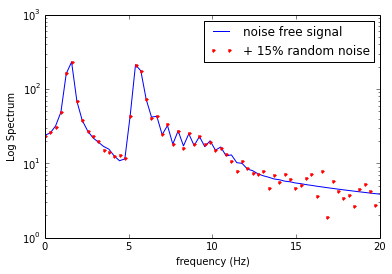

In [6]:
fs = np.fft.fftfreq(n, 3.14159/n)
pylab.plot(fs[:n/2], np.abs(np.fft.fft(y[:n/2])), 'b-', label="noise free signal")  # just half spectrum needed (real functions)
pylab.plot(fs[:n/2], np.abs(np.fft.fft(y2[:n/2])), '.r', label="+ 15% random noise")
pylab.xlim(0, 20)
pylab.ylim(1, 1000)
pylab.legend(loc=1)
pylab.yscale('log')
pylab.xlabel('frequency (Hz)')
pylab.ylabel('Log Spectrum')
pylab.show()

In [7]:
def coherence(t0, t1):
    """
    Coefficient of coherence between two identical traces
    As defined by G. Henry the difference between those two traces
    will be due the random noise present
    
    Parameters:
    
    * t0 : array
        first trace must be stationary (zero mean)    
    * t1 : array
        second trace must be stationary (zero mean)
        
    Returns:
    
    * coherence: array
    
    """
    aut0 = np.correlate(t0, t1, 'same')
    aut1 = np.correlate(t1, t0, 'same')
    aut = np.fft.fft(np.correlate(aut0, aut1, 'same'))
    cros = np.fft.fft(np.correlate(np.correlate(t0, t0, 'same'), np.correlate(t1, t1,'same'), 'same'))    
    return np.sqrt(np.abs(aut/cros)) # just the modulus part

**Based on coherence coeficient calculates S/N (Signal/Noise) ratio for:**
    
    a) two traces with 5% noise
    b) two traces with 15% noise

###Plots the coherence function for each pair of traces 5% and 15%###

###The closer $C(f)$ to 1 the better!###

###Or the closer $\left|1-C(f)\right|$ to 0 the better###

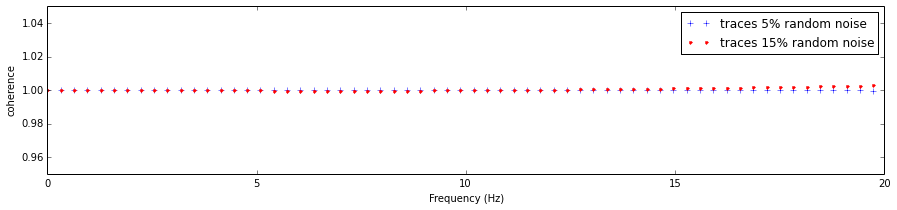

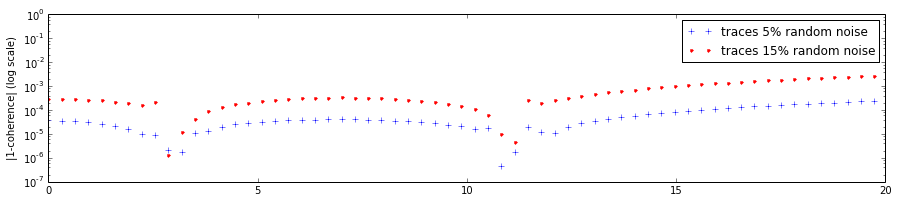

In [8]:
fs = np.fft.fftfreq(n, 3.14159/n)
c0 = coherence(y0, y1)
c1 = coherence(y2, y3)
pylab.figure(figsize=(15,3))
ax = pylab.subplot(111)
ax.plot(fs[:n/2], c0[:n/2], '+b', label="traces 5% random noise")
ax.plot(fs[:n/2], c1[:n/2], '.r', label="traces 15% random noise")
pylab.legend()
pylab.xlim(0, 20) # just the range of frequencies we did input
pylab.ylim(0.95, 1.05)
pylab.ylabel('coherence')
pylab.xlabel('Frequency (Hz)')
pylab.figure(figsize=(15,3))
ax = pylab.subplot(111)
ax.plot(fs[:n/2], np.abs(1-c0[:n/2]), '+b', label="traces 5% random noise")
ax.plot(fs[:n/2], np.abs(1-c1[:n/2]), '.r', label="traces 15% random noise")
pylab.xlim(0, 20) # just the range of frequencies we did input
pylab.ylabel('|1-coherence| (log scale)')
pylab.yscale('log')
pylab.legend()
pylab.show()

From the coherence coeficient we can then calculate the signal to noise energy ratio:
    
$$ \left| \frac{S}{N} \right|^2 = \frac{C(f)}{1-C(f)} $$
    
Since all that matters is the deviation from 1 we can simple re-write as:

$$ \left| \frac{S}{N}\right|^2 = \frac{C(f)}{\left| 1-C(f) \right|} $$

###We plot than the comparison of the S/N ratio in Db scale###

dB scale = $10*log(x/A0)$ where i am using A0=1

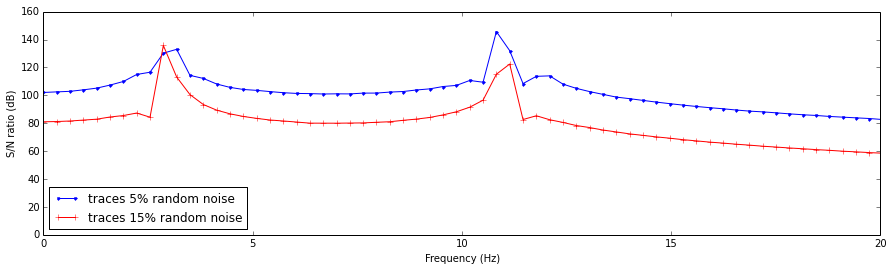

In [9]:
fs = np.fft.fftfreq(n, 3.14159/n)
sn0 = c0/np.abs(1-c0)
sn1 = c1/np.abs(1-c1)
# db scale (amplitude is 20*)
sn0 = 20*np.log(sn0)
sn1 = 20*np.log(sn1)
pylab.figure(figsize=(15,4))
ax = pylab.subplot(111)
ax.plot(fs[:n/2], sn0[:n/2], '.b-', label="traces 5% random noise")
ax.plot(fs[:n/2], sn1[:n/2], '+r-', label="traces 15% random noise")
pylab.xlim(0, 20)
pylab.ylabel('S/N ratio (dB)') # 
pylab.xlabel('Frequency (Hz)')
pylab.legend(loc=3)
pylab.show()

Comparing the auto-correlation functions between the original trace and a noisy trace.

The variations on the auto-correlation functions are really small when plot for comparison due the phase-alligment?

The significative difference can only been seen on 0 lag due the random noise being stronger (**red**)

Note also that the absolute values of the cross or auto-correlations are related to the number of samples

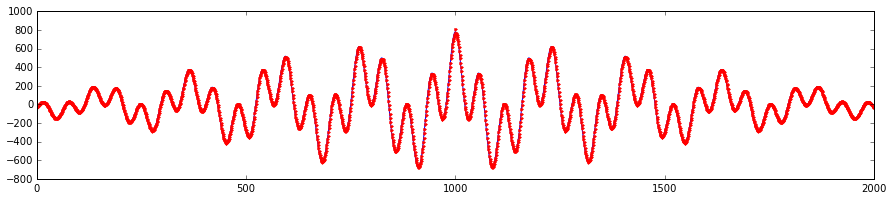

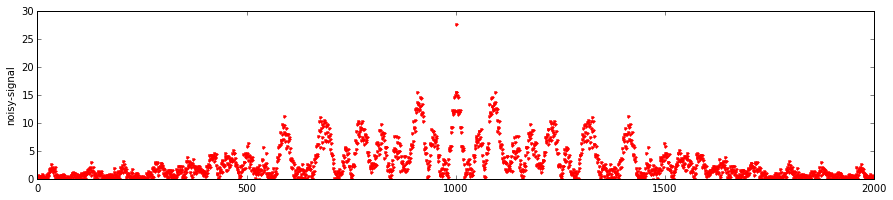

In [45]:
sg = np.correlate(y, y, 'same')
ns = np.correlate(y2, y2, 'same')
pylab.figure(figsize=(15,3))
pylab.plot(sg, 'b-')
pylab.plot(ns, '.r')
pylab.figure(figsize=(15,3))
pylab.plot(np.abs(ns-sg), '.r')
pylab.ylabel('noisy-signal')
#print sg.sum()
#print ns.sum()